In [1]:
#Importamos librerías
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [3]:
#Cargamos los datos y los preparamos!
data = pd.read_csv("hotels.csv", sep = ",")

In [4]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [5]:
#Hacemos una copia del dataset y me quedo con algunas variables
data2 = data[['total_of_special_requests','deposit_type','customer_type', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces','arrival_date_month',
'arrival_date_day_of_month','hotel']].copy()

In [6]:
#Veamos que tenemos!
data2.head()

total_of_special_requests deposit_type customer_type  \
0                          0   No Deposit     Transient   
1                          0   No Deposit     Transient   
2                          0   No Deposit     Transient   
3                          0   No Deposit     Transient   
4                          1   No Deposit     Transient   

   stays_in_weekend_nights  stays_in_week_nights  required_car_parking_spaces  \
0                        0                     0                            0   
1                        0                     0                            0   
2                        0                     1                            0   
3                        0                     1                            0   
4                        0                     2                            0   

  arrival_date_month  arrival_date_day_of_month         hotel  
0               July                          1  Resort Hotel  
1               July                          1  Resort Hotel  
2               July                          1  Resort Hotel  
3               July                          1  Resort Hotel  
4               July                          1  Resort Hotel

In [7]:
data2.shape

(119390, 9)

Creamos la variable target: 
    

In [8]:
data2['total_stay'] = data2['stays_in_week_nights'] + data2['stays_in_weekend_nights']

# Eliminamos las var q usamos...
data3 = data2.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)

In [9]:
data3.head()

total_of_special_requests deposit_type customer_type  \
0                          0   No Deposit     Transient   
1                          0   No Deposit     Transient   
2                          0   No Deposit     Transient   
3                          0   No Deposit     Transient   
4                          1   No Deposit     Transient   

   required_car_parking_spaces arrival_date_month  arrival_date_day_of_month  \
0                            0               July                          1   
1                            0               July                          1   
2                            0               July                          1   
3                            0               July                          1   
4                            0               July                          1   

          hotel  total_stay  
0  Resort Hotel           0  
1  Resort Hotel           0  
2  Resort Hotel           1  
3  Resort Hotel           1  
4  Resort Hotel           2

Text(0, 0.5, 'Frecuencia')

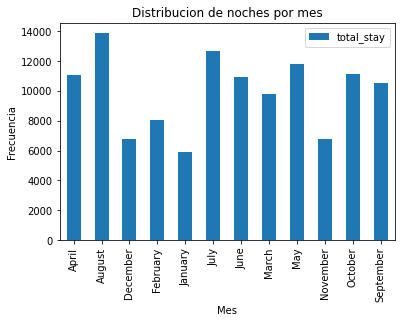

In [10]:
grafico_df=data3[['total_stay','arrival_date_month']].groupby('arrival_date_month').count()
grafico_df
import seaborn as sns
import matplotlib.pyplot as plt
grafico_df.plot(kind='bar')
plt.title('Distribucion de noches por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

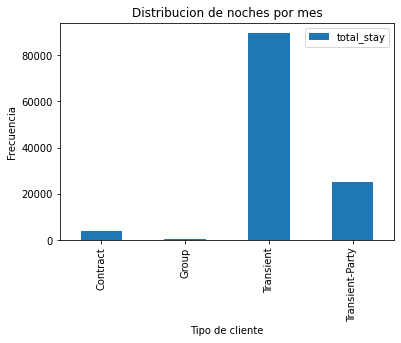

In [11]:
grafico_df=data3[['total_stay','customer_type']].groupby('customer_type').count()
grafico_df
import seaborn as sns
import matplotlib.pyplot as plt
grafico_df.plot(kind='bar')
plt.title('Distribucion de noches por mes')
plt.xlabel('Tipo de cliente')
plt.ylabel('Frecuencia')

Histogramas de las variables:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed04768050>,
      dtype=object)

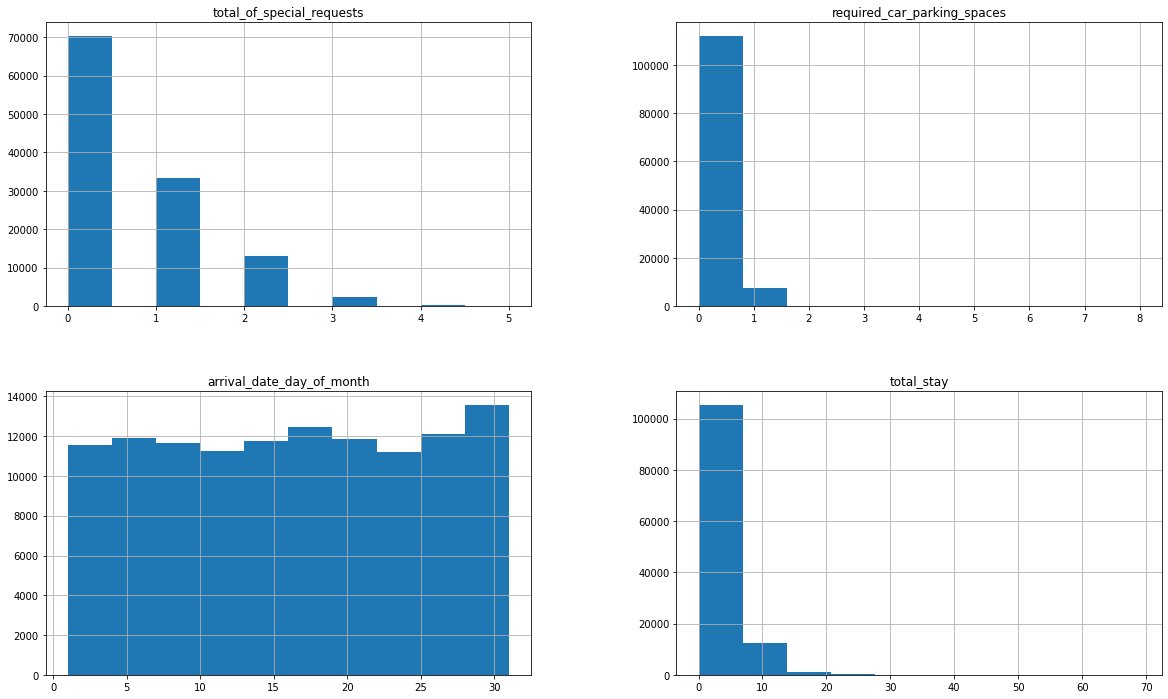

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,12)) #Definimos el tamaño del grafico
data3.hist(ax = fig.gca()) #Realizamos el histograma de las variables

In [13]:
data3.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [14]:
data3.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [15]:
#Hacemos dummies las variables!
data4=pd.get_dummies(data3, drop_first=False)

In [16]:
data4.head()

total_of_special_requests  required_car_parking_spaces  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          1                            0   

   arrival_date_day_of_month  total_stay  deposit_type_No Deposit  \
0                          1           0                        1   
1                          1           0                        1   
2                          1           1                        1   
3                          1           1                        1   
4                          1           2                        1   

   deposit_type_Non Refund  deposit_type_Refundable  customer_type_Contract  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       0   

   customer_type_Group  customer_type_Transient  ...  \
0                    0                        1  ...   
1                    0                        1  ...   
2                    0                        1  ...   
3                    0                        1  ...   
4                    0                        1  ...   

   arrival_date_month_January  arrival_date_month_July  \
0                           0                        1   
1                           0                        1   
2                           0                        1   
3                           0                        1   
4                           0                        1   

   arrival_date_month_June  arrival_date_month_March  arrival_date_month_May  \
0                        0                         0                       0   
1                        0                         0                       0   
2                        0                         0                       0   
3                        0                         0                       0   
4                        0                         0                       0   

   arrival_date_month_November  arrival_date_month_October  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   arrival_date_month_September  hotel_City Hotel  hotel_Resort Hotel  
0                             0                 0                   1  
1                             0                 0                   1  
2                             0                 0                   1  
3                             0                 0                   1  
4                             0                 0                   1  

[5 rows x 25 columns]

In [17]:
#Separamos los datos de entrada de los de salida
X_data=data4.drop('total_stay', axis=1)
y_data=data4['total_stay']

In [18]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [19]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [20]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [50,100,200],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[4,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # 
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [ ]:
%%time
#Entrenamos el modelo (Se demora bastante!!!!!!)
grid_random_forest.fit(X_train, y_train)

In [ ]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid_random_forest.best_params_

{'criterion': 'mse', 'max_depth': 5, 'max_features': 5, 'n_estimators': 100}

In [ ]:
random_forest_nuevo = RandomForestRegressor(criterion='mse',max_depth=5, max_features= 5, n_estimators=100) #Instanciamos el modelo

In [ ]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
X_train.shape

(83573, 24)

In [ ]:
X_test=X_test.drop(columns=['Prediccion'])
X_test

total_of_special_requests  ...  hotel_Resort Hotel
88645                           0  ...                   0
115346                          0  ...                   0
81707                           0  ...                   0
14952                           0  ...                   1
61982                           0  ...                   0
...                           ...  ...                 ...
21811                           0  ...                   1
108990                          1  ...                   0
63933                           0  ...                   0
96754                           1  ...                   0
84834                           0  ...                   0

[35817 rows x 24 columns]

In [ ]:
#Predicción de casos nuevos
random_forest_nuevo.predict(X_train)
random_forest_nuevo.predict(X_test)

array([3.11173552, 3.20761548, 2.66031522, ..., 2.75972258, 3.16871809,
       3.17148881])

In [ ]:
import numpy as np
X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

total_of_special_requests  ...  Prediccion
88645                           0  ...         3.0
115346                          0  ...         3.0
81707                           0  ...         3.0
14952                           0  ...         5.0
61982                           0  ...         3.0
...                           ...  ...         ...
21811                           0  ...         4.0
108990                          1  ...         3.0
63933                           0  ...         3.0
96754                           1  ...         3.0
84834                           0  ...         3.0

[35817 rows x 25 columns]

Sólo nos restaría analizar las métricas de error, pero ese tema lo veremos en la sección correspondiente 😉

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>